In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

import bean as be
from bean import Edit
import bean.plotting.editing_patterns

In [2]:
#plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
plt.style.use('default')

# Load and prepare ReporterScreen


## Tiling screen data

In [4]:
cdata = be.read_h5ad(f"../../results/filtered_annotated/LDLRCDS/bean_count_LDLRCDS_masked.h5ad")

In [5]:
cdata_bulk = cdata[:,cdata.samples.bin == "bulk"]

In [6]:
cdata_bulk_fs = cdata_bulk[:,~cdata_bulk.samples.rep.isin([f"rep{n}" for n in range(1,5)])]

In [7]:
sum(cdata_bulk_fs.guides.index.map(lambda x: "CONTROL" in x))

150

In [8]:
cedit_rates_df = bean.plotting.editing_patterns.get_edit_rates(cdata_bulk_fs)

Calibrating edits in editable positions...:   0%|          | 0/7320 [00:00<?, ?it/s]

## Variant targeting screen

Guides in this data has designated target position at one of P3-8 with. We will use the target position editing efficiency for PAM preference and not for position-wise editing efficiency analyses.

In [9]:
vdata = be.read_h5ad(f"../../results/filtered_annotated/LDLvar/bean_count_LDLvar_masked.h5ad")

In [10]:
vdata_bulk = vdata[:, vdata.samples.bin == "bulk"]

In [11]:
vdata_bulk_fs = vdata_bulk[:,~vdata_bulk.samples.rep.isin([f"rep{n}" for n in range(1,5)])]

In [12]:
target_pos = vdata_bulk_fs.guides.loc[vdata_bulk_fs.uns['edit_counts'].guide, "target_pos"].reset_index(drop=True)

In [13]:
rel_pos = vdata_bulk_fs.uns['edit_counts'].edit.map(lambda e: e.rel_pos)

In [14]:
vdata_bulk_fs.uns['target_edit_counts'] = vdata_bulk_fs.uns['edit_counts'].loc[rel_pos == target_pos, :].reset_index(drop=True)

In [15]:
vedit_rates_df = be.pl.editing_patterns.get_edit_rates(vdata_bulk_fs, edit_count_key='target_edit_counts', add_absent=False)

<Axes: xlabel='Protospacer position', ylabel='A>G editing rate'>

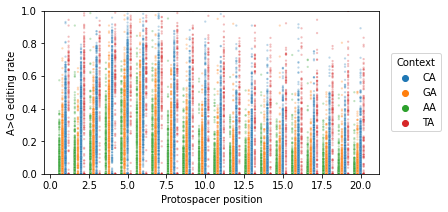

In [16]:
be.pl.editing_patterns.plot_by_pos_context(cedit_rates_df)

### BE-Hive like plotting


In [17]:
cedit_rates_df.spacer_pos = cedit_rates_df.spacer_pos.astype(int)

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:192: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.groupby(["base_change", "spacer_pos"])


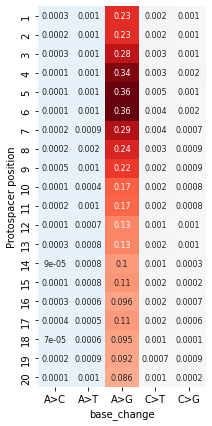

In [18]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"]
)
plt.savefig("1b_pos_eff_behive_LDLRCDS.pdf", bbox_inches = 'tight')

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:192: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.groupby(["base_change", "spacer_pos"])


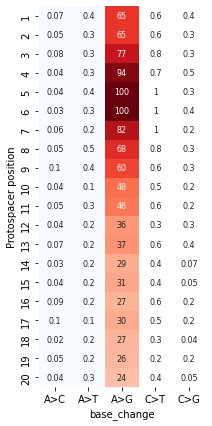

In [19]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"],
    normalize=True
)
plt.savefig("1b_pos_eff_behive_LDLRCDS_normed.pdf", bbox_inches = 'tight')

## Combination with PAM


In [20]:
cedit_rates_df_ag = cedit_rates_df.loc[cedit_rates_df.base_change == "A>G",:].reset_index(drop=True)

In [21]:
cedit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context,spacer_pos_ctxt
0,10_2511_neg,11224163:25:-:A>-,0.000000,0.00000,25,20,A>-,CA,20.0
1,10_2511_neg,11224163:25:-:A>G,0.102041,0.08296,25,20,A>G,CA,20.0
2,10_2511_neg,11224163:25:-:A>T,0.000000,0.00000,25,20,A>T,CA,20.0
3,10_2511_neg,11224164:24:-:C>-,0.000000,0.00000,24,19,C>-,TC,NaN
4,10_2511_neg,11224165:23:-:T>-,0.000000,0.00000,23,18,T>-,CT,NaN
...,...,...,...,...,...,...,...,...,...
238755,Intron 1 DNaseHS 2_5671_pos,17:17:+:A>G,0.000000,0.00000,17,12,A>G,AA,11.6
238756,Intron 1 DNaseHS 2_5674_pos,13:13:+:A>G,0.000000,0.00000,13,8,A>G,GA,7.8
238757,Intron 1 DNaseHS 2_5674_pos,18:18:+:A>G,0.000000,0.00000,18,13,A>G,AA,12.6
238758,Intron 1 DNaseHS 2_5686_pos,21:21:+:A>G,0.000000,0.00000,21,16,A>G,GA,15.8


In [22]:
len(cedit_rates_df.guide.unique())

7320

In [23]:
plt.style.use('default')

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:334: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.loc[(edit_rates_df.base_change == bdata.target_base_change)]


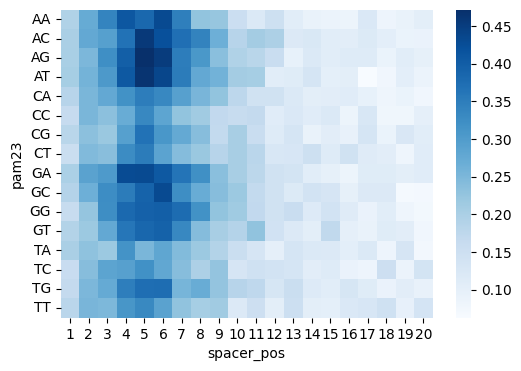

In [24]:
pos_by_pam = be.pl.editing_patterns.plot_by_pos_pam(cdata_bulk_fs, cedit_rates_df_ag)
plt.savefig("1b_pos_by_pam_LDLRCDS.pdf", bbox_inches = 'tight')

In [25]:
pos_by_pam.to_csv("1c_pos_by_pam.csv")

In [26]:
cedit_rates_df_ag_P38=cedit_rates_df_ag.loc[cedit_rates_df_ag.spacer_pos.isin([3,4,5,6,7,8])]

In [27]:
max_P38_by_pam = cedit_rates_df_ag_P38.groupby(["guide", "pam23"])["rep_mean"].max()
edit_P38_by_pam = max_P38_by_pam.groupby("pam23").mean()

In [28]:
print(edit_P38_by_pam.min())
print(edit_P38_by_pam.max())

0.31844003849081925
0.4602241876600649


In [29]:
edit_P38_by_pam = cedit_rates_df_ag_P38.groupby("pam23")["rep_mean"].mean()
print(edit_P38_by_pam.min())
print(edit_P38_by_pam.max())

0.2577707270827402
0.38487039961332487


In [30]:
cedit_rates_df_ag_P56=cedit_rates_df_ag.loc[cedit_rates_df_ag.spacer_pos.isin([5,6])]
edit_P56_by_pam = cedit_rates_df_ag_P56.groupby("pam23")["rep_mean"].mean()
print(edit_P56_by_pam.min())
print(edit_P56_by_pam.max())

0.2689044216141381
0.4606465974748453


In [31]:
vedit_rates_df_ag = vedit_rates_df.loc[vedit_rates_df.base_change == "A>G",:].reset_index(drop=True)
cedit_rates_df_ag_window = cedit_rates_df_ag.loc[(cedit_rates_df_ag.spacer_pos >= 3) & (cedit_rates_df_ag.spacer_pos <= 8)].copy()
all_rates = deepcopy(pd.concat([cedit_rates_df_ag_window, vedit_rates_df_ag]))

## Context preference logo


In [32]:
def info_content(v, background = 0.25):
    v=v/v.sum()
    print(v)
    """Get information content-normalized v for 1d np.ndarry v"""
    return ((v*np.log2(v/background)).sum())*v

In [33]:
cedit_rates_df_ag_window["context"] = cedit_rates_df_ag_window.apply(
    lambda row: cdata_bulk_fs.guides.loc[row.guide, "Reporter"][
        row.rel_pos - 1 : row.rel_pos + 2
    ],
    axis=1,
)

In [34]:
con_mean_er = {}
for i in range(3):
    cedit_rates_df_ag_window[f"context_{i}"] = cedit_rates_df_ag_window.context.map(lambda s: s[i])
    con_mean_er[i] = cedit_rates_df_ag_window.groupby(f"context_{i}")["rep_mean"].mean()

In [35]:
con_mean_er

{0: context_0
 A    0.176958
 C    0.410452
 G    0.252429
 T    0.566291
 Name: rep_mean, dtype: float64,
 1: context_1
 A    0.32484
 Name: rep_mean, dtype: float64,
 2: context_2
 A    0.271765
 C    0.359757
 G    0.319412
 T    0.339770
 Name: rep_mean, dtype: float64}

In [36]:
bg = con_mean_er[1]["A"]
context_0 = info_content(con_mean_er[0], background = 0.25)
context_2 = info_content(con_mean_er[2], background = 0.25)

context_0
A    0.125848
C    0.291902
G    0.179520
T    0.402730
Name: rep_mean, dtype: float64
context_2
A    0.210556
C    0.278729
G    0.247471
T    0.263244
Name: rep_mean, dtype: float64


In [37]:
context_0

context_0
A    0.016599
C    0.038501
G    0.023678
T    0.053119
Name: rep_mean, dtype: float64

In [38]:
ic_tbl = pd.concat([con_mean_er[0]/con_mean_er[0].sum(), pd.DataFrame([1,0,0,0], index=["A", "C", "G", "T"]), con_mean_er[2]/con_mean_er[2].sum()], axis=1).T
ic_tbl.index = [-1, 0, 1]

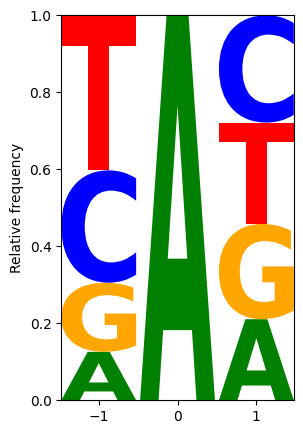

In [39]:
fig, ax = plt.subplots(figsize=(3,5))

logomaker.Logo(ic_tbl, ax = ax)
ax.set_ylabel("Relative frequency")
fig.savefig("context_preference_3_8.pdf")

In [40]:
ic_tbl.to_csv("1b_context.csv")